In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('census.csv')
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Age: Numérica discreta
# Workclass: classe de trabalho (categórica nominal)
#final-weight: (Numérica contínua)
# education: (Categórica ordinal)
#education-num: (numérico discreta)
# marital-status: (categórica nominal)
# occupation: (categórica nominal)
#relationship: (categórica nominal)
# race: (categórica nominal)
#sex: (categórica nominal)
#capital gain: (Numérica discreta)
#capital loos: (Numérica contínua)
#hour per week: (Numérica discreta)
#native country: (categórica nominal)

In [4]:
df.describe()

# Analisando os quartis vemos que em 50% da base de dados as pessoas tem até 37 anos de idade

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

#Como não ha valor faltante não é necessário fazer nenhum tratamento adicional

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [11]:
np.unique(df['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

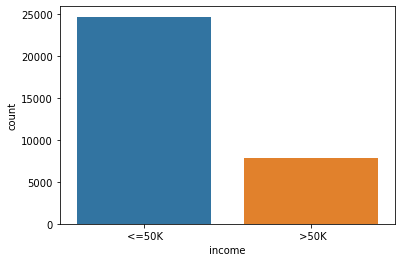

In [12]:
sns.countplot(x = df['income']);

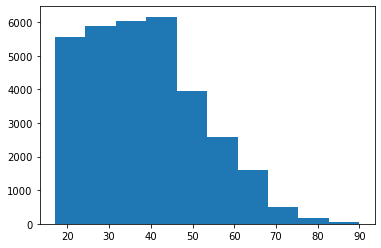

In [13]:
plt.hist(x=df['age']);

# a maioria das diades esta entre 17 - 45 anos +-

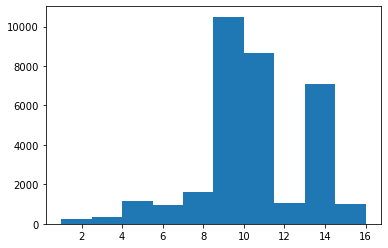

In [14]:
plt.hist(x=df['education-num']);

#em geral a maioria das pessoas estudam entre 9-10 anos

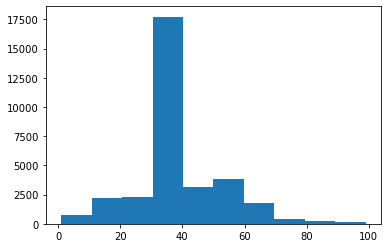

In [18]:
plt.hist(x=df['hour-per-week']);

#a grande maioria das pessoas trabalham entre 35-40 horas semanais

In [41]:
grafico = px.treemap(df, path=['workclass', 'age'])
grafico.show()

#mostra os agrupamentos
#? = dados n informados

In [40]:
grafico1 = px.parallel_categories(df, dimensions=['education', 'income'])
grafico1.show()

# percebemos que a maioria das pessoas que ganham mais de 50K anual é ligado a pessoas com mestrado/bacharelado

**Divisao entre previsores e classes**

In [5]:
x_df = df.iloc[:,0:14].values
x_df

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [6]:
y_df = df.iloc[:,14].values
y_df

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# **Tratamento de atributos categóricos (LabelEncoder e OneHotEncoder)**

Os algoritmos utilizam cálculos matemáticos que não é possível ser feito através de dados categóricos (strings), então transformaremos essas strings em valores numéricos.

Um dos problemas de utilizar somente o LabelEncoder é que podemos ter muitas categorias e os valores serão diferentes, sendo assim, o algoritmo pode considerar categorias com maior índice mais importante que categorias com menor ìndice nos cálculos, sendo que são apenas categorias diferentes.

Exemplificando:

##### carro
##### LabelEncoder:
Gol - 1 | Palio - 2 | Uno - 3

##### OneHotEncoder: (resolve o problema de um atributo ser mais importante que o outro)
Gol - 1 0 0 | Palio - 0 1 0 | Uno - 0 0 1
     

In [7]:
x_df[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [8]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [9]:
x_df[:, 1] = label_encoder_workclass.fit_transform(x_df[:, 1])
x_df[:, 3] = label_encoder_education.fit_transform(x_df[:, 3])
x_df[:, 5] = label_encoder_education.fit_transform(x_df[:, 5])
x_df[:, 6] = label_encoder_education.fit_transform(x_df[:, 6])
x_df[:, 7] = label_encoder_education.fit_transform(x_df[:, 7])
x_df[:, 8] = label_encoder_education.fit_transform(x_df[:, 8])
x_df[:, 9] = label_encoder_education.fit_transform(x_df[:, 9])
x_df[:,13] = label_encoder_education.fit_transform(x_df[:,13])

In [10]:
x_df

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [11]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
#remainder = passtrhough nao vai apagar os atributos e so vai fzr transformaçao na lista que selecionamos
One_hot_encoder_df = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder = 'passthrough')

In [13]:
#toarray faz a conversao para numpy array
x_df = One_hot_encoder_df.fit_transform(x_df).toarray()

In [14]:
# Com o OneHotEncoder o numero de colunas aumentou para 108
x_df.shape

(32561, 108)

Podemos, então, primeiramente aplicar o LabelEncoder para transformar os atributos categóricos em um número inteiro simples e depois, fazemos a aplicação do OneHotEncoder

# Escalonamento dos valores utilizando a padronização


In [15]:
from sklearn.preprocessing import StandardScaler

census = StandardScaler()
x_df = census.fit_transform(x_df)

In [16]:
x_df[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão das bases de treinamento e teste


In [17]:
from sklearn.model_selection import train_test_split

x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df, y_df, test_size = 0.15, random_state = 0)

#random state serve como um set.seed() -> faz sempre a mesma divisao da base de dados
#pelo fato de ser uma base de dados maior, utilizaremos maior porentagem para conjunto de treinamento

In [18]:
x_df_train.shape, y_df_train.shape

((27676, 108), (27676,))

In [19]:
x_df_test.shape, y_df_test.shape

((4885, 108), (4885,))

# Salvar as variáveis

Utilizaremos para não precisar refazer todo o pré-processamento

In [20]:
#import pickle

#with open('census.pkl', mode = 'wb') as f:
#    pickle.dump([x_df_train, y_df_train, x_df_test, y_df_test], f)

In [55]:
from sklearn.naive_bayes import GaussianNB
naive_df = GaussianNB()
naive_df.fit(x_df_train, y_df_train)

GaussianNB()

In [56]:
previsoes = naive_df.predict(x_df_test)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    
accuracy_score(y_df_test, previsoes)

#taxa de acurácia muito baixa. Temos apenas 2 respostas e seria mais facil jogar uma moeda cara ou coroa para acertar a previsao
#do que esse algoritmo

0.4767656090071648

In [75]:
confusion_matrix(y_df_test, previsoes)

# Para classe < 50k algoritmo tem bom desempenho mas para <50k o desempenho é muito ruim

array([[1172, 2521],
       [  35, 1157]], dtype=int64)

In [78]:
print(classification_report(y_df_test, previsoes))

#  o algoritmo consegue identificar corretamente 97% das pessoas '>50k' e quando identifica, sua precisão é de 31%
#  o algoritmo consegue identificar corretamente 32% das pessoas '<50k' e quando identifica, sua precisão é de 97%

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

